# Decision Tree Classification

Configure the project. Indeed you create a dataset in csv format.

In [1]:
! rm -rf *.csv
! unzip ./dataset/archive.zip
! mv *.csv data.csv


Archive:  ./dataset/archive.zip
  inflating: Factors_ affecting_ university_student_grades_dataset.csv  


Import needed libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics


%matplotlib inline

Read data from data.csv using pandas and store in data frame structure. Also shuffle data to have uniform distribution. 

In [3]:
df = pd.read_csv("data.csv")
df.head()
df = df.sample(frac=1.0, random_state=42).reset_index(drop=True)
df.head()

,Age,Gender,Parental_Education,Family_Income,Previous_Grades,Attendance,Class_Participation,Study_Hours,Major,School_Type,...,Peer_Group,Bullying,Study_Space,Learning_Style,Tutoring,Mentoring,Lack_of_Interest,Time_Wasted_on_Social_Media,Sports_Participation,Grades
0,20.0,M,High School,60000.0,A,NaN,Medium,6.0,Business,NaN,...,Negative,Yes,Yes,NaN,No,No,Medium,1.0,Low,A
1,21.0,M,Some College,NaN,A,NaN,Low,NaN,Law,Public,...,Negative,No,No,Auditory,No,No,High,6.0,Medium,B
2,18.0,M,Some College,50000.0,A,81.0,Medium,6.0,Medicine,Public,...,Positive,Yes,No,Kinesthetic,NaN,Yes,NaN,4.0,Low,C
3,NaN,F,Graduate,30000.0,A,90.0,Low,18.0,Business,NaN,...,Negative,Yes,No,Visual,Yes,No,High,6.0,High,B
4,18.0,F,Graduate,40000.0,B,75.0,NaN,8.0,Medicine,Public,...,Positive,Yes,Yes,Auditory,No,Yes,High,6.0,Low,A


## Preprocessing

In [4]:
print(df.shape)
print(df.columns)

(10064, 35)
Index(['Age', 'Gender', 'Parental_Education', 'Family_Income',
       'Previous_Grades', 'Attendance', 'Class_Participation', 'Study_Hours',
       'Major', 'School_Type', 'Financial_Status', 'Parental_Involvement',
       'Educational_Resources', 'Motivation', 'Self_Esteem', 'Stress_Levels',
       'School_Environment', 'Professor_Quality', 'Class_Size',
       'Extracurricular_Activities', 'Sleep_Patterns', 'Nutrition',
       'Physical_Activity', 'Screen_Time', 'Educational_Tech_Use',
       'Peer_Group', 'Bullying', 'Study_Space', 'Learning_Style', 'Tutoring',
       'Mentoring', 'Lack_of_Interest', 'Time_Wasted_on_Social_Media',
       'Sports_Participation', 'Grades'],
      dtype='object')


In [5]:
categorical_attr = ['Gender', 'Parental_Education', 'Previous_Grades', 'Class_Participation', 'Major', 'School_Type', 'Financial_Status', 'Parental_Involvement', 'Educational_Resources', 'Motivation', 'Self_Esteem', 'Stress_Levels', 'School_Environment', 'Professor_Quality', 'Class_Size', 'Extracurricular_Activities', 'Nutrition', 'Physical_Activity', 'Educational_Tech_Use', 'Peer_Group', 'Bullying', 'Study_Space', 'Learning_Style', 'Tutoring', 'Mentoring', 'Lack_of_Interest', 'Sports_Participation', 'Grades']

le = LabelEncoder()
df[categorical_attr] = df[categorical_attr].apply(le.fit_transform, axis=0)
df.head()

,Age,Gender,Parental_Education,Family_Income,Previous_Grades,Attendance,Class_Participation,Study_Hours,Major,School_Type,...,Peer_Group,Bullying,Study_Space,Learning_Style,Tutoring,Mentoring,Lack_of_Interest,Time_Wasted_on_Social_Media,Sports_Participation,Grades
0,20.0,1,2,60000.0,0,NaN,2,6.0,1,2,...,0,1,1,3,0,0,2,1.0,1,0
1,21.0,1,3,NaN,0,NaN,1,NaN,3,1,...,0,0,0,0,0,0,0,6.0,2,1
2,18.0,1,3,50000.0,0,81.0,2,6.0,4,1,...,2,1,0,1,2,1,3,4.0,1,2
3,NaN,0,1,30000.0,0,90.0,1,18.0,1,2,...,0,1,0,2,1,0,0,6.0,0,1
4,18.0,0,1,40000.0,1,75.0,3,8.0,4,1,...,2,1,1,0,0,1,0,6.0,1,0


In [6]:
for column, dtype in df.dtypes.items():
    if dtype not in ['int64', 'float64']:
        print(f"Column: {column}, Type: {dtype}")

Column: Family_Income, Type: object


In [7]:
df['Family_Income'] = pd.to_numeric(df['Family_Income'], errors='coerce')

# Now convert the column to float
df['Family_Income'] = df['Family_Income'].astype(float)

In [8]:
df.fillna(df.mean(numeric_only=True), inplace=True)
df.head()

,Age,Gender,Parental_Education,Family_Income,Previous_Grades,Attendance,Class_Participation,Study_Hours,Major,School_Type,...,Peer_Group,Bullying,Study_Space,Learning_Style,Tutoring,Mentoring,Lack_of_Interest,Time_Wasted_on_Social_Media,Sports_Participation,Grades
0,20.000000,1,2,60000.000000,0,84.908499,2,6.000000,1,2,...,0,1,1,3,0,0,2,1.0,1,0
1,21.000000,1,3,50953.166227,0,84.908499,1,12.467761,3,1,...,0,0,0,0,0,0,0,6.0,2,1
2,18.000000,1,3,50000.000000,0,81.000000,2,6.000000,4,1,...,2,1,0,1,2,1,3,4.0,1,2
3,19.996703,0,1,30000.000000,0,90.000000,1,18.000000,1,2,...,0,1,0,2,1,0,0,6.0,0,1
4,18.000000,0,1,40000.000000,1,75.000000,3,8.000000,4,1,...,2,1,1,0,0,1,0,6.0,1,0


In [9]:
# summarize data
df.describe() 

,Age,Gender,Parental_Education,Family_Income,Previous_Grades,Attendance,Class_Participation,Study_Hours,Major,School_Type,...,Peer_Group,Bullying,Study_Space,Learning_Style,Tutoring,Mentoring,Lack_of_Interest,Time_Wasted_on_Social_Media,Sports_Participation,Grades
count,10064.000000,10064.000000,10064.000000,10064.000000,10064.000000,10064.000000,10064.000000,10064.000000,10064.000000,10064.000000,...,10064.000000,10064.000000,10064.000000,10064.000000,10064.000000,10064.000000,10064.00000,10064.000000,10064.000000,10064.000000
mean,19.996703,0.644475,1.746423,50953.166227,1.193661,84.908499,1.194157,12.467761,2.812997,0.643680,...,1.180644,0.655604,0.651630,1.207969,0.640898,0.643979,1.18124,3.489329,1.193661,1.210056
std,1.337728,0.650941,1.293809,14846.212370,0.973236,8.525212,0.974515,4.380774,1.916058,0.646522,...,0.974972,0.647757,0.653583,0.978946,0.644364,0.645994,0.97231,1.623672,0.970373,0.981896
min,18.000000,0.000000,0.000000,30000.000000,0.000000,70.000000,0.000000,5.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
25%,19.000000,0.000000,1.000000,40000.000000,0.000000,78.000000,0.000000,9.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,0.000000,0.000000
50%,20.000000,1.000000,2.000000,50000.000000,1.000000,84.908499,1.000000,12.467761,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.489329,1.000000,1.000000
75%,21.000000,1.000000,3.000000,60000.000000,2.000000,92.000000,2.000000,16.000000,4.000000,1.000000,...,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.00000,5.000000,2.000000,2.000000
max,22.000000,2.000000,4.000000,75000.000000,3.000000,100.000000,3.000000,20.000000,6.000000,2.000000,...,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.00000,6.000000,3.000000,3.000000


Print the histogram chart of data

In [10]:
print(df.columns)

Index(['Age', 'Gender', 'Parental_Education', 'Family_Income',
       'Previous_Grades', 'Attendance', 'Class_Participation', 'Study_Hours',
       'Major', 'School_Type', 'Financial_Status', 'Parental_Involvement',
       'Educational_Resources', 'Motivation', 'Self_Esteem', 'Stress_Levels',
       'School_Environment', 'Professor_Quality', 'Class_Size',
       'Extracurricular_Activities', 'Sleep_Patterns', 'Nutrition',
       'Physical_Activity', 'Screen_Time', 'Educational_Tech_Use',
       'Peer_Group', 'Bullying', 'Study_Space', 'Learning_Style', 'Tutoring',
       'Mentoring', 'Lack_of_Interest', 'Time_Wasted_on_Social_Media',
       'Sports_Participation', 'Grades'],
      dtype='object')


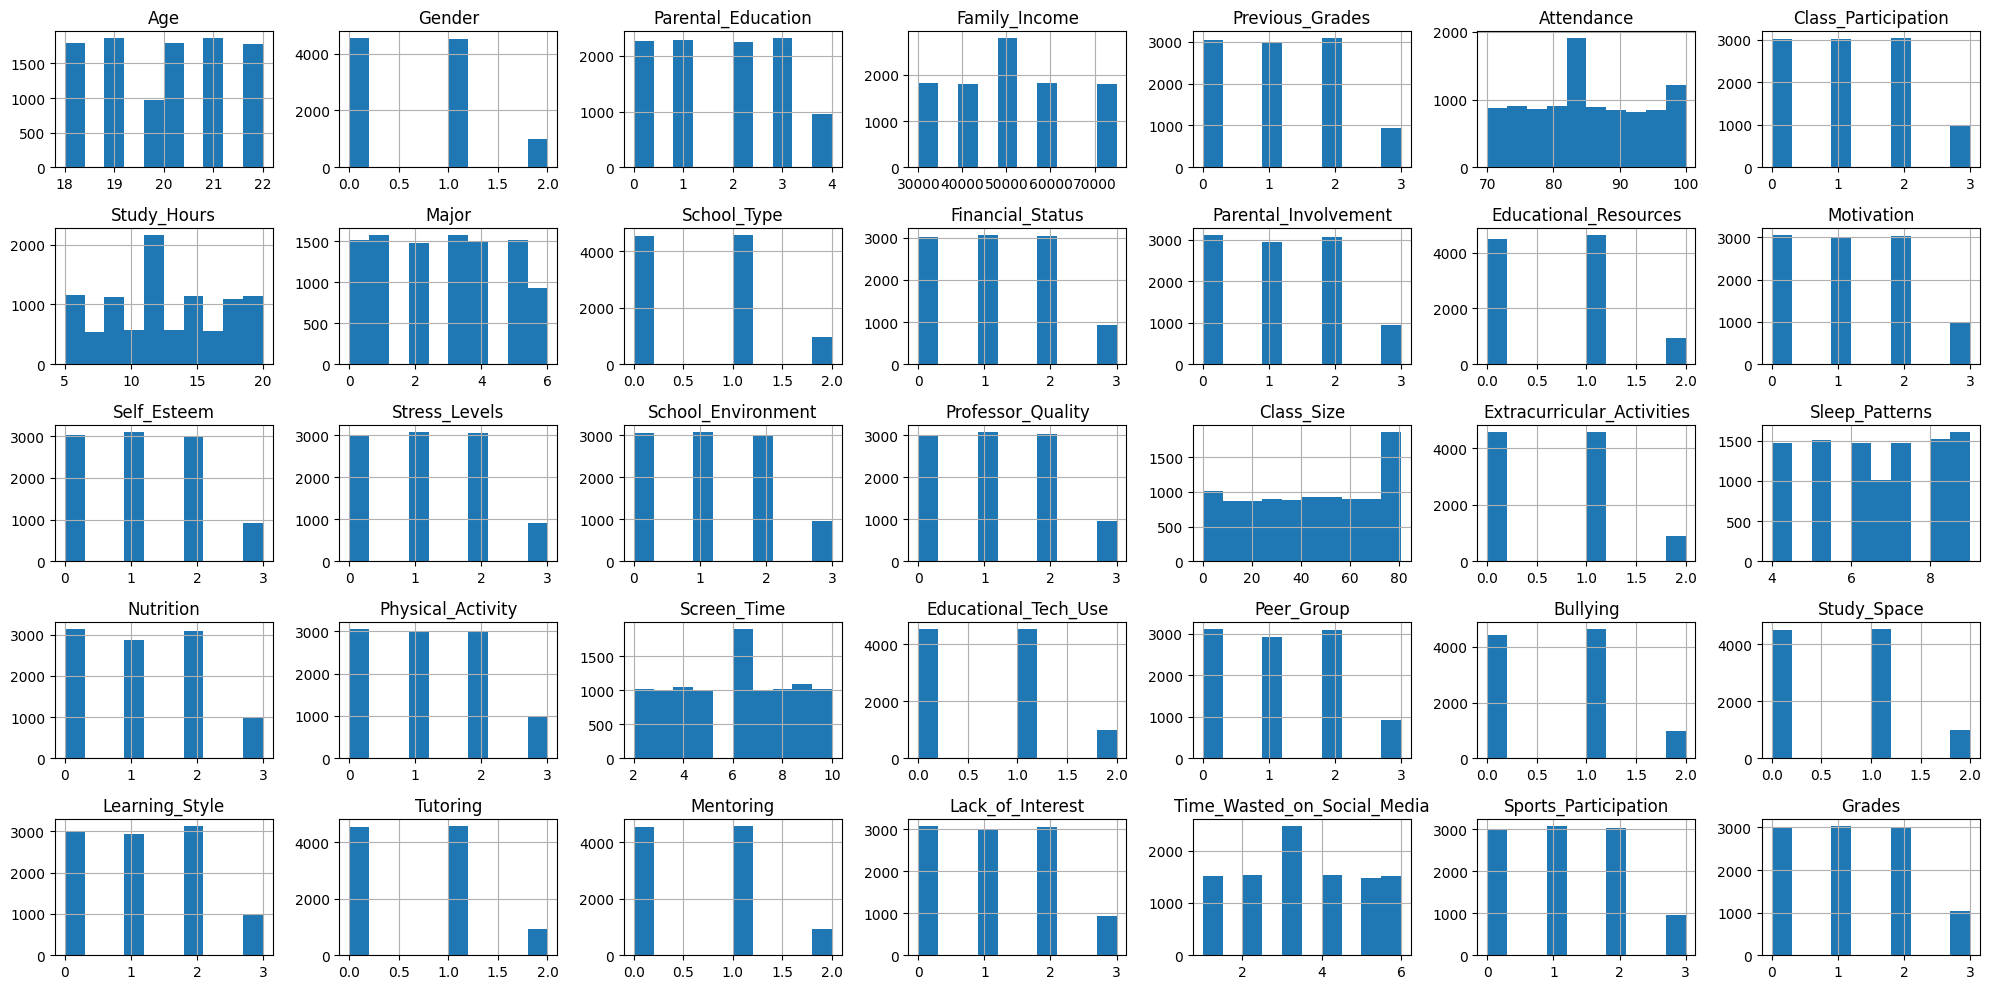

In [11]:
viz = df[['Age', 'Gender', 'Parental_Education', 'Family_Income', 'Previous_Grades', 'Attendance', 'Class_Participation', 'Study_Hours', 'Major', 'School_Type', 'Financial_Status', 'Parental_Involvement', 'Educational_Resources', 'Motivation', 'Self_Esteem', 'Stress_Levels', 'School_Environment', 'Professor_Quality', 'Class_Size', 'Extracurricular_Activities', 'Sleep_Patterns', 'Nutrition', 'Physical_Activity', 'Screen_Time', 'Educational_Tech_Use', 'Peer_Group', 'Bullying', 'Study_Space', 'Learning_Style', 'Tutoring', 'Mentoring', 'Lack_of_Interest', 'Time_Wasted_on_Social_Media', 'Sports_Participation', 'Grades']]
fig, axes = plt.subplots(nrows=5, ncols=7, figsize=(20, 10))

axes = axes.flatten()

for i, column in enumerate(viz.columns):
    viz[column].hist(ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

In [12]:
# print(df)
train, test = train_test_split(df, test_size=0.20, random_state=42)
# test, evaluate = train_test_split(test, test_size=0.5, random_state=42)

## Fit model based on data. 

In [13]:
train_x = np.asanyarray(train[['Age', 'Gender', 'Parental_Education', 'Family_Income', 'Previous_Grades', 'Attendance', 'Class_Participation', 'Study_Hours', 'Major', 'School_Type', 'Financial_Status', 'Parental_Involvement', 'Educational_Resources', 'Motivation', 'Self_Esteem', 'Stress_Levels', 'School_Environment', 'Professor_Quality', 'Class_Size', 'Extracurricular_Activities', 'Sleep_Patterns', 'Nutrition', 'Physical_Activity', 'Screen_Time', 'Educational_Tech_Use', 'Peer_Group', 'Bullying', 'Study_Space', 'Learning_Style', 'Tutoring', 'Mentoring', 'Lack_of_Interest', 'Time_Wasted_on_Social_Media', 'Sports_Participation']])
train_y = np.asanyarray(train[['Grades']])
GradeTree = DecisionTreeClassifier(criterion="entropy" , max_depth = 10)

In [14]:
test_x = np.asanyarray(test[['Age', 'Gender', 'Parental_Education', 'Family_Income', 'Previous_Grades', 'Attendance', 'Class_Participation', 'Study_Hours', 'Major', 'School_Type', 'Financial_Status', 'Parental_Involvement', 'Educational_Resources', 'Motivation', 'Self_Esteem', 'Stress_Levels', 'School_Environment', 'Professor_Quality', 'Class_Size', 'Extracurricular_Activities', 'Sleep_Patterns', 'Nutrition', 'Physical_Activity', 'Screen_Time', 'Educational_Tech_Use', 'Peer_Group', 'Bullying', 'Study_Space', 'Learning_Style', 'Tutoring', 'Mentoring', 'Lack_of_Interest', 'Time_Wasted_on_Social_Media', 'Sports_Participation']])
test_y = np.asanyarray(test[['Grades']])

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [16]:
GradeTree.fit(train_x, train_y)
PredTree = GradeTree.predict(test_x)

In [17]:
print(test_y[0:10])
print(PredTree[0:10])

[[0]
 [3]
 [3]
 [1]
 [0]
 [0]
 [1]
 [1]
 [2]
 [2]]
[1 1 1 0 2 3 2 2 1 0]


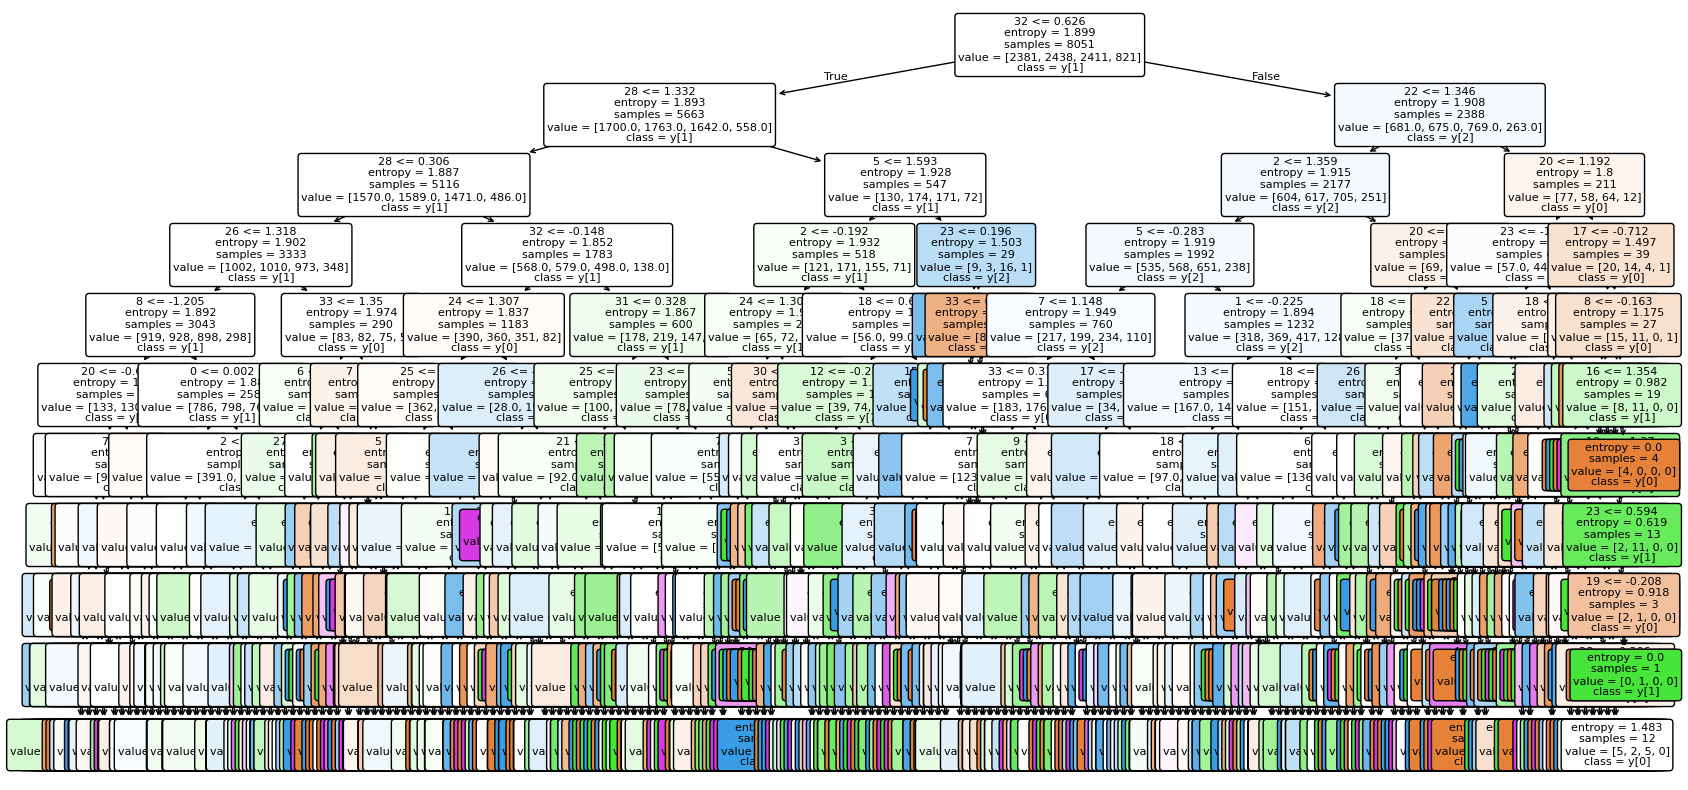

In [18]:
train_x_df = pd.DataFrame(train_x)
plt.figure(figsize=(20,10))
plot_tree(GradeTree, filled=True, feature_names=train_x_df.columns, class_names=True, rounded=True, fontsize=8)
plt.show()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.362519 to fit



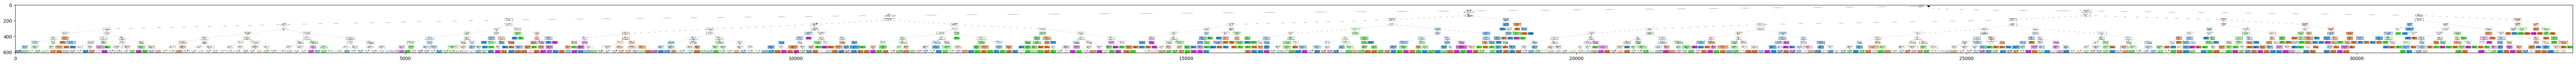

In [19]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 


class_names = list(map(str, np.unique(train_y)))

dot_data = StringIO()
filename = "Gradetree.png"
featureNames = df.columns[0:34]
out = tree.export_graphviz(GradeTree, feature_names=featureNames, out_file=dot_data, class_names=class_names, filled=True, special_characters=True, rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img, interpolation='nearest')

## Evaluation

In [20]:
print("Accuracy: " , metrics.accuracy_score(PredTree, test_y))

Accuracy:  0.2886239443616493


<hr>
<hr>
<hr>
<hr>


In [21]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 15, 20, 25, 30, 35], 'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 20, 30, 40, 50]}
GradeTree = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5)
GradeTree.fit(train_x, train_y)

print(GradeTree.best_params_)

GradeTree = GradeTree.best_estimator_


{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 50}


In [22]:
GradeTree.fit(train_x, train_y)
PredTree = GradeTree.predict(test_x)

In [23]:
print("Accuracy: " , metrics.accuracy_score(PredTree, test_y))

Accuracy:  0.3035270740188773


<font size="5" color="red">

** It can be usual for decision trees to have lower accuracy compared to other models. This is because: **

1. Overfitting: Decision trees tend to overfit the training data, especially if they're deep.
2. Bias-Variance Tradeoff: They often have high variance and lower bias.
3. Data Sensitivity: Small changes in data can significantly affect the structure of the tree.

</font>

<hr>
<hr>
<hr>
<hr>


<font size="5" color="red">

Let's try it one more time, although I don't expect we will get remarkably good results.

</font>

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

df = pd.read_csv("data.csv")
df = df.sample(frac=1.0, random_state=42).reset_index(drop=True)

df = df.dropna()

categorical_attr = ['Gender', 'Parental_Education', 'Previous_Grades', 'Class_Participation', 'Major', 'School_Type', 'Financial_Status', 'Parental_Involvement', 'Educational_Resources', 'Motivation', 'Self_Esteem', 'Stress_Levels', 'School_Environment', 'Professor_Quality', 'Class_Size', 'Extracurricular_Activities', 'Nutrition', 'Physical_Activity', 'Educational_Tech_Use', 'Peer_Group', 'Bullying', 'Study_Space', 'Learning_Style', 'Tutoring', 'Mentoring', 'Lack_of_Interest', 'Sports_Participation', 'Grades']

le = LabelEncoder()
df[categorical_attr] = df[categorical_attr].apply(le.fit_transform, axis=0)

# Separate features and target
X = df.drop('Grades', axis=1)
y = df['Grades']


X = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20, 30],
    'min_samples_leaf': [1, 5, 10, 20]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

from sklearn.model_selection import cross_val_score

# Evaluate the model with cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())


Accuracy: 0.4111111111111111
Cross-Validation Accuracy Scores: [0.31666667 0.25       0.36666667 0.28813559 0.40677966]
Mean Cross-Validation Accuracy: 0.3256497175141243


<font size="5" color="Yellow">

OK! So for this dataset Decision Tree is not good choice... Try it with other methods (Neural network recommended)

</font>